In [1]:
import VQE
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Optimal with h from -0.1 to 0.1

hs1 = np.round(np.arange(-0.1, 0, 0.006), 3)
hs2 = np.round(np.arange(0, 0.1006, 0.006), 3)
hs = np.concatenate((hs1, hs2))
costs = []
for h in hs:
    # VQE.optimal(h)
    cost = np.min(np.loadtxt("cost_" + str(h) + ".txt", dtype=np.complex_))
    costs.append(np.real(cost))

c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


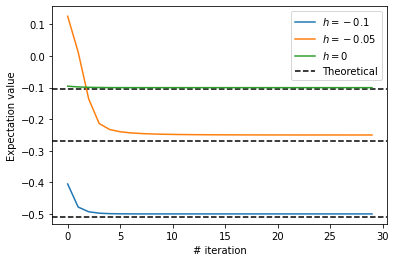

In [15]:
cost1 = np.loadtxt("./cost_-0.1.txt", dtype=np.complex_)
cost2 = np.loadtxt("./cost_-0.05.txt", dtype=np.complex_)
cost3 = np.loadtxt("./cost_0.0.txt", dtype=np.complex_)
plt.plot(cost1, label = "$h=-0.1$")
plt.axhline(y=-0.10583, color = 'black', linestyle='--')
plt.plot(cost2, label = "$h=-0.05$")
plt.axhline(y=-0.269744, color = 'black', linestyle='--')
plt.plot(cost3, label = "$h=0$")
plt.axhline(y=-0.509973, color = 'black', linestyle='--', label = "Theoretical")
plt.xticks(range(0, 31, 5))
plt.xlabel("# iteration")
plt.ylabel("Expectation value")
plt.legend()
plt.savefig("-0.1.-0.05.0.eps", format = 'eps', dpi = 1000)

In [3]:
VQE.optimal(-0.004)

Iteration:  0


c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9


c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


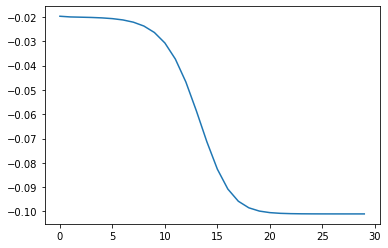

In [10]:
cost = np.loadtxt("cost_-0.004.txt", dtype=np.complex_)
plt.plot(cost)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


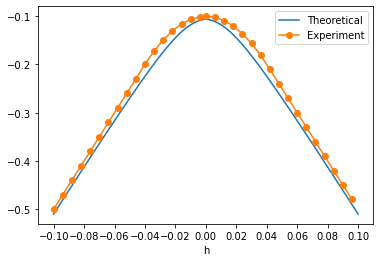

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
cost_theori = pd.read_excel('./image/data.xlsx')
cost_theori = np.array(cost_theori)

plt.plot([d[0] for d in cost_theori], [d[1] for d in cost_theori], label = "Theoretical")
plt.plot(hs, costs, '-o', label = "Experiment")
plt.xticks([-0.1,-0.08,-0.06, -0.04,-0.02,0, 0.02, 0.04, 0.06, 0.08, 0.1])
plt.xlabel("h")
plt.legend()
plt.savefig("compare.eps", format = 'eps', dpi = 1000)

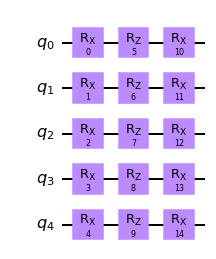

In [10]:
import qiskit
n = 5
thetas = np.zeros(3*n)
for i in range(0, thetas.shape[0]):
    thetas[i] += i
qc = qiskit.QuantumCircuit(n)
for i in range(0, n):
    qc.rx(thetas[i], i)
    qc.rz(thetas[i+n], i)
    qc.rx(thetas[i+2*n], i)
qc.draw('mpl')